In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
df = pd.read_csv(dataset_url)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                56 non-null     int64  
 1   Flight Number             56 non-null     int64  
 2   Launch Site               56 non-null     object 
 3   class                     56 non-null     int64  
 4   Payload Mass (kg)         56 non-null     float64
 5   Booster Version           56 non-null     object 
 6   Booster Version Category  56 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.2+ KB


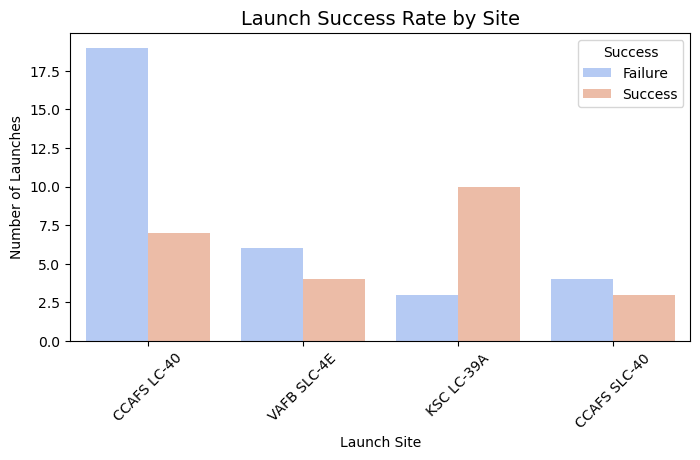

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Launch Site', hue='class', palette='coolwarm')
plt.title("Launch Success Rate by Site", fontsize=14)
plt.xlabel("Launch Site")
plt.ylabel("Number of Launches")
plt.legend(title="Success", labels=["Failure", "Success"])
plt.xticks(rotation=45)
plt.show()


C:\Users\Razaf\AppData\Local\Temp\ipykernel_1524\2208063087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y='Payload Mass (kg)', palette='Set2')


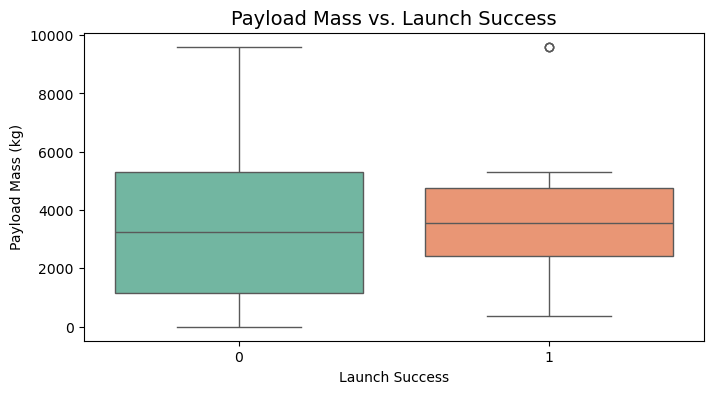

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='class', y='Payload Mass (kg)', palette='Set2')
plt.title("Payload Mass vs. Launch Success", fontsize=14)
plt.xlabel("Launch Success")
plt.ylabel("Payload Mass (kg)")
plt.show()


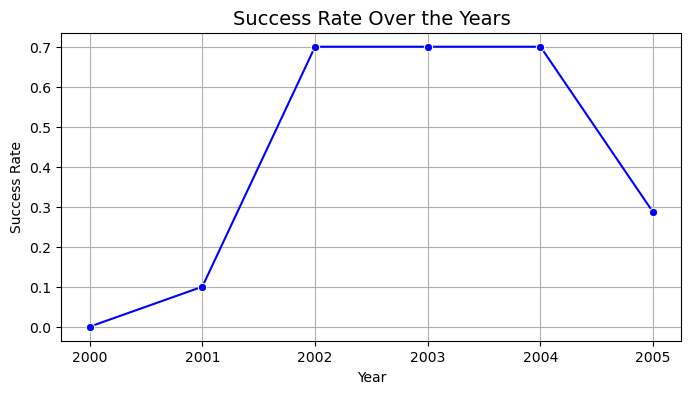

In [23]:
df['LaunchYear'] = df['Flight Number'].apply(lambda x: 2000 + x // 10)
success_rate = df.groupby('LaunchYear')['class'].mean()
plt.figure(figsize=(8, 4))
sns.lineplot(x=success_rate.index, y=success_rate.values, marker="o", color='b')
plt.title("Success Rate Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.grid(True)
plt.show()


In [27]:
!pip install folium


   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.9 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/110.9 kB 262.6 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.9 kB 363.1 kB/s eta 0:00:01
   -------------------------------------- 110.9/110.9 kB 495.8 kB/s eta 0:00:00


In [33]:
import folium
import pandas as pd

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
df_geo = pd.read_csv(URL)

print(df_geo.head())

launch_map = folium.Map(location=[28.5, -80.5], zoom_start=5)

for index, row in df_geo.iterrows():
    folium.Marker(
        location=[row["Lat"], row["Long"]],
        popup=row["Launch Site"],
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(launch_map)

launch_map.save("launch_sites_map.html")

print("✅ Carte sauvegardée sous 'launch_sites_map.html'")


   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  Payload Mass (kg)  \
0               Dragon Spacecraft Qualification Unit                0.0   
1  Dragon demo flight C1, two CubeSats,  barrel o...                0.0   
2                             Dragon demo flight C2+              525.0   
3                                       SpaceX CRS-1              500.0   
4                                       SpaceX CRS-2              677.0   

       Orbit         Customer        Landing Outcome  class        Lat  \
0        LEO           SpaceX  Failure   (

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
df = pd.read_csv(dataset_url)

print("Colonnes disponibles :", df.columns)

label_encoder_site = LabelEncoder()
label_encoder_booster = LabelEncoder()

df['Launch_Site_Encoded'] = label_encoder_site.fit_transform(df['Launch Site'])
df['Booster_Version_Encoded'] = label_encoder_booster.fit_transform(df['Booster Version Category'])

features = df[['Payload Mass (kg)', 'Launch_Site_Encoded', 'Booster_Version_Encoded']]
target = df['class']  # "class" indique succès (1) ou échec (0)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy:.2f}")


Colonnes disponibles : Index(['Unnamed: 0', 'Flight Number', 'Launch Site', 'class',
       'Payload Mass (kg)', 'Booster Version', 'Booster Version Category'],
      dtype='object')
✅ Model Accuracy: 0.67
